**Decision tree algorithm for TIC TAC TOE.**<br>The concept is 'x' wins when it gets three in a row out of eight available options.


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/tic-tac-toe-endgame.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


**checking for null values**

In [116]:
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

In [117]:
for i in df.columns:
  print(df[i].value_counts())
  print()

x    418
o    335
b    205
Name: V1, dtype: int64

x    378
o    330
b    250
Name: V2, dtype: int64

x    418
o    335
b    205
Name: V3, dtype: int64

x    378
o    330
b    250
Name: V4, dtype: int64

x    458
o    340
b    160
Name: V5, dtype: int64

x    378
o    330
b    250
Name: V6, dtype: int64

x    418
o    335
b    205
Name: V7, dtype: int64

x    378
o    330
b    250
Name: V8, dtype: int64

x    418
o    335
b    205
Name: V9, dtype: int64

positive    626
negative    332
Name: V10, dtype: int64



In [118]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')

**To convert categorical data to numeric data**  <br>
We can use either use pandas.get_dummies() or sklearn.preprocessing.OneHotEncoder()

In [119]:
x_num = pd.get_dummies(df[['V1','V2','V3','V4','V5','V6','V7','V8','V9']],drop_first = True)

In [120]:
x_num

,V1_o,V1_x,V2_o,V2_x,V3_o,V3_x,V4_o,V4_x,V5_o,V5_x,V6_o,V6_x,V7_o,V7_x,V8_o,V8_x,V9_o,V9_x
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1
954,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1
955,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1
956,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1


In [121]:
x_num.columns

Index(['V1_o', 'V1_x', 'V2_o', 'V2_x', 'V3_o', 'V3_x', 'V4_o', 'V4_x', 'V5_o',
       'V5_x', 'V6_o', 'V6_x', 'V7_o', 'V7_x', 'V8_o', 'V8_x', 'V9_o', 'V9_x'],
      dtype='object')

In [122]:
df_V10 = df['V10'].map({'negative': 0, 'positive': 1})

**Setting the target variable**

In [123]:
y = df.iloc[:,9].values

**Splitting the dataset**

In [124]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_num,y,test_size = 0.33, random_state = 42)

**Feature Scaling :** to scale the values, else the computer considers higher values as bigger ones and lower values as smaller ones without considering their unit

In [125]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

**Fitting decision tree to training dataset**

In [126]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =  42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Predicting the values**

In [127]:
y_pred= classifier.predict(x_test)
y_pred

array(['negative', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'positi

**Confusion Matrix**

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 95,   7],
       [  9, 206]])

Only 9+7 = 16 incorrect predictions, rest 95+206 = 301 predictions are correct

**Incorrect Predictions**

In [133]:
incorrect_pred = (y_test != y_pred).sum()
incorrect_pred

16

**Classification Report**

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.93      0.92       102
    positive       0.97      0.96      0.96       215

    accuracy                           0.95       317
   macro avg       0.94      0.94      0.94       317
weighted avg       0.95      0.95      0.95       317



**Visualizing the Tree**

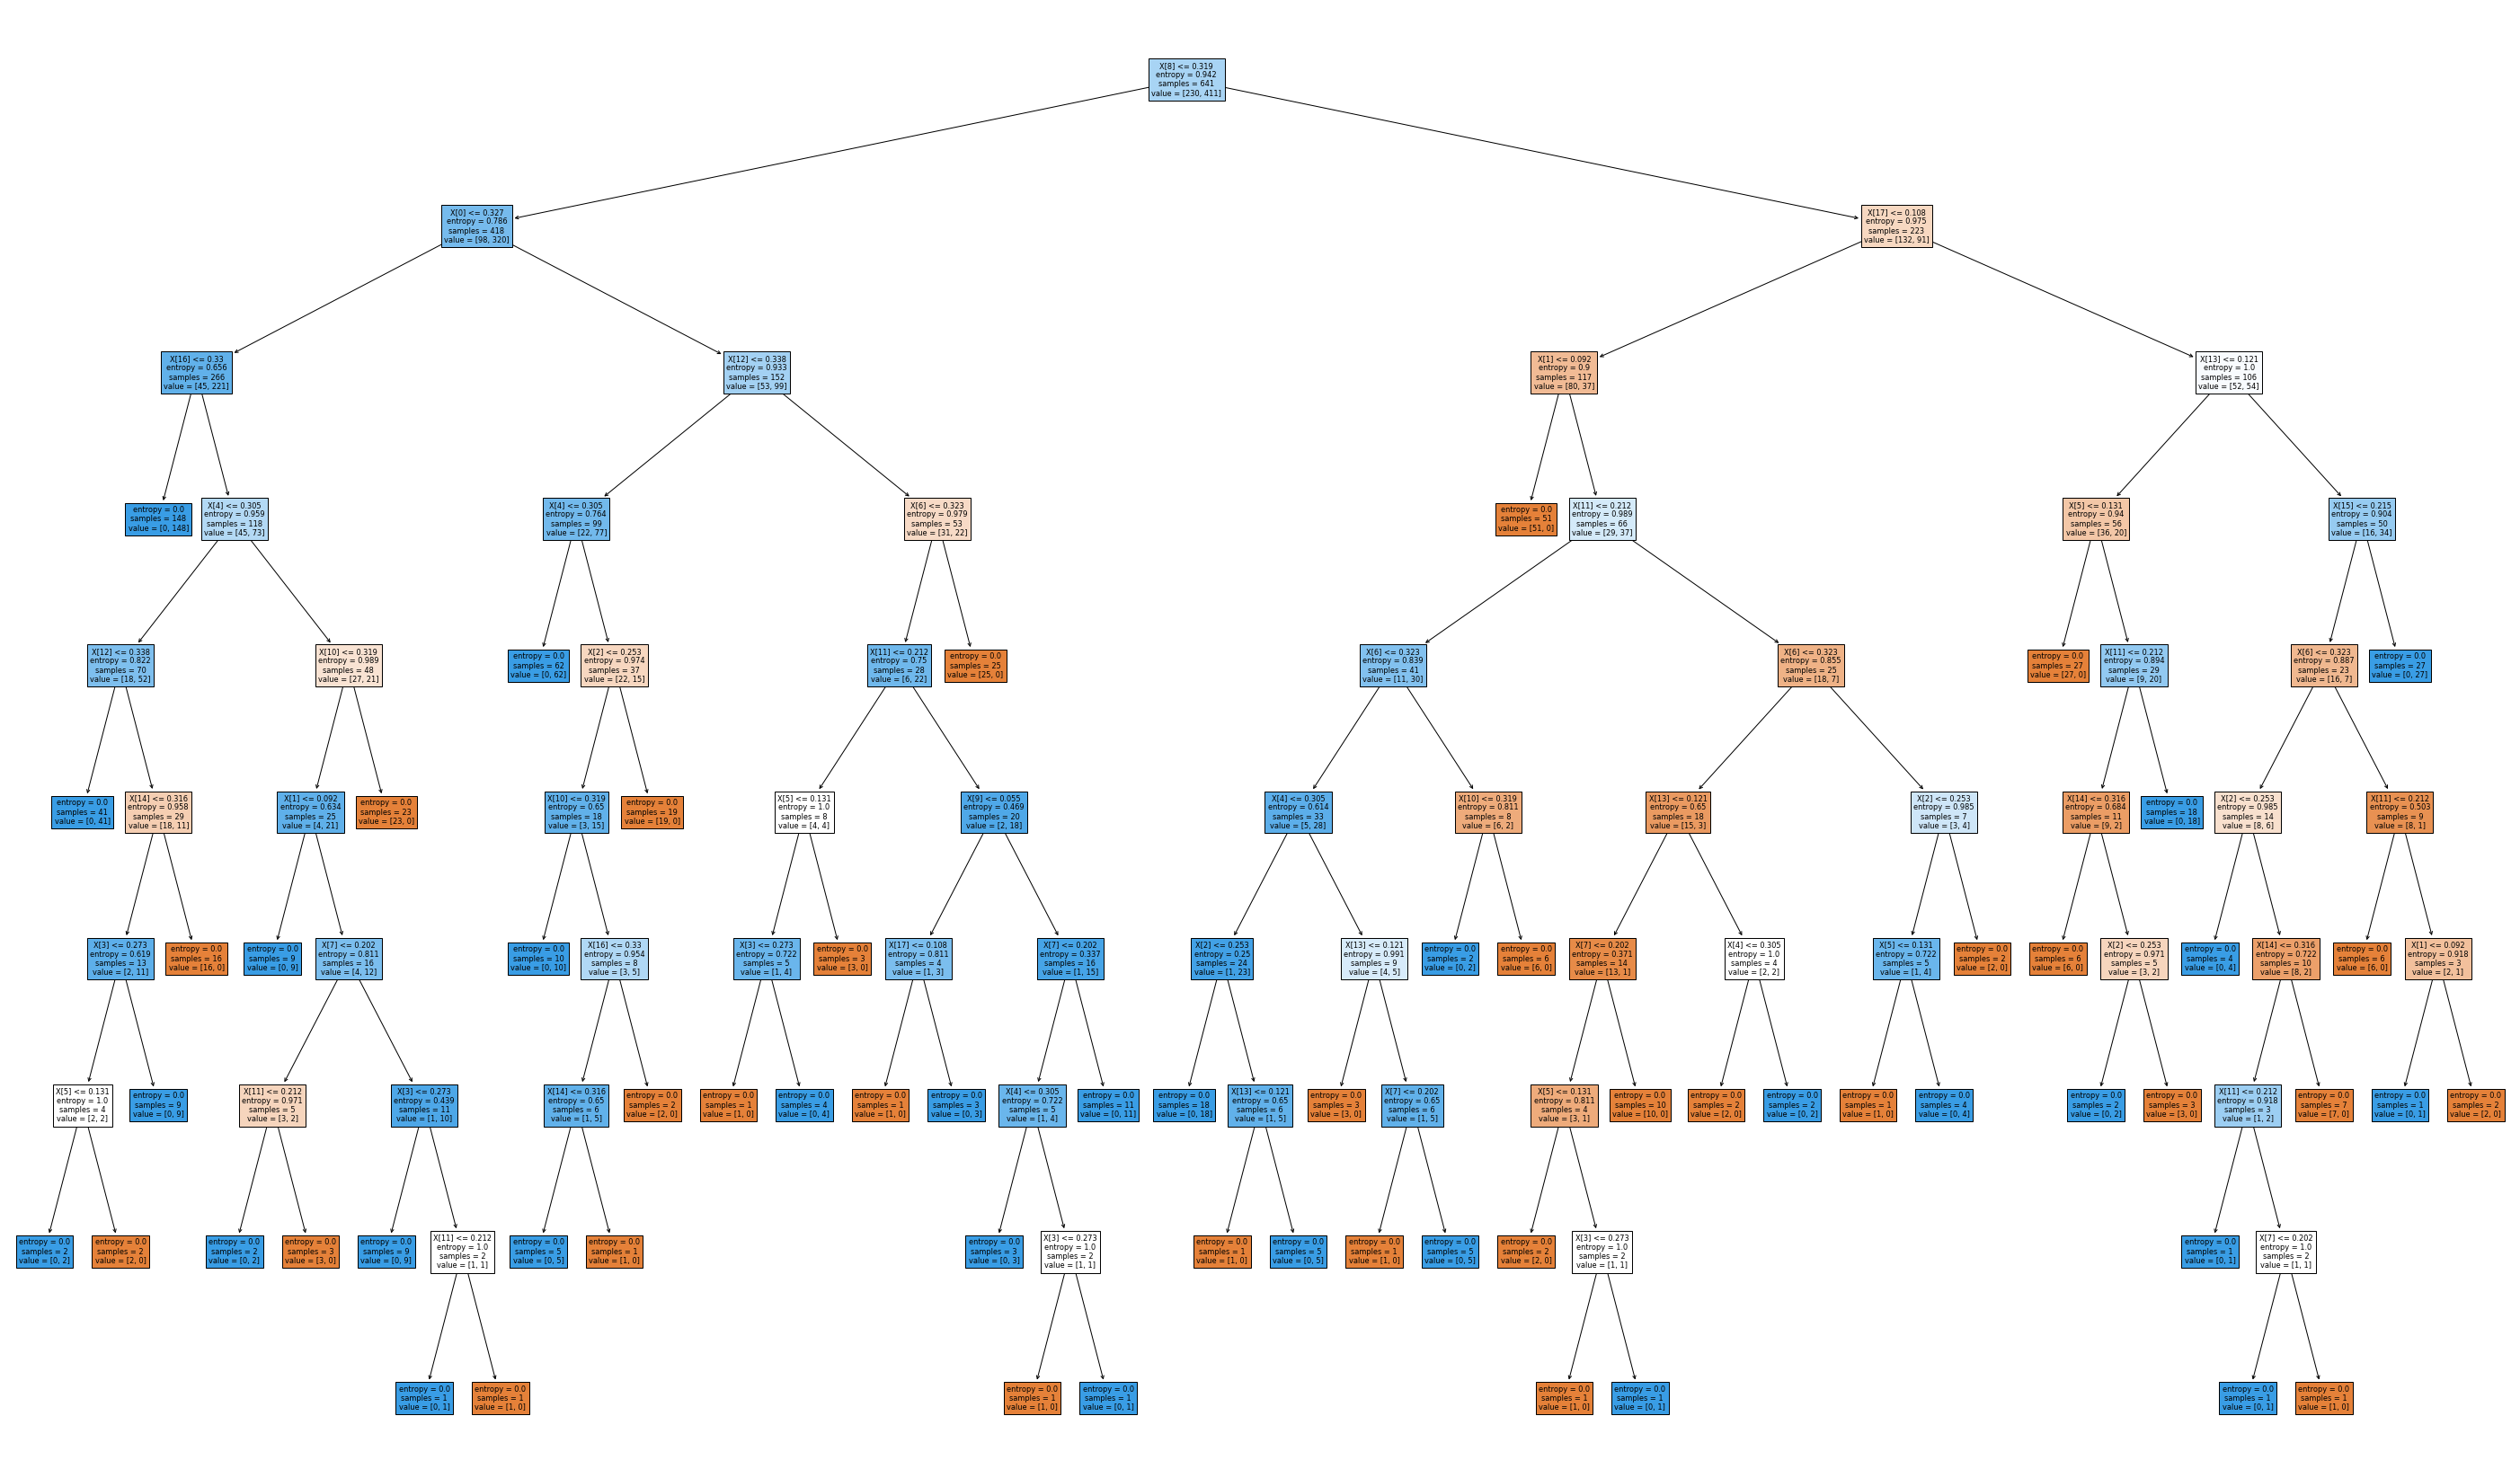

In [130]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(classifier,filled=True)
plt.show()

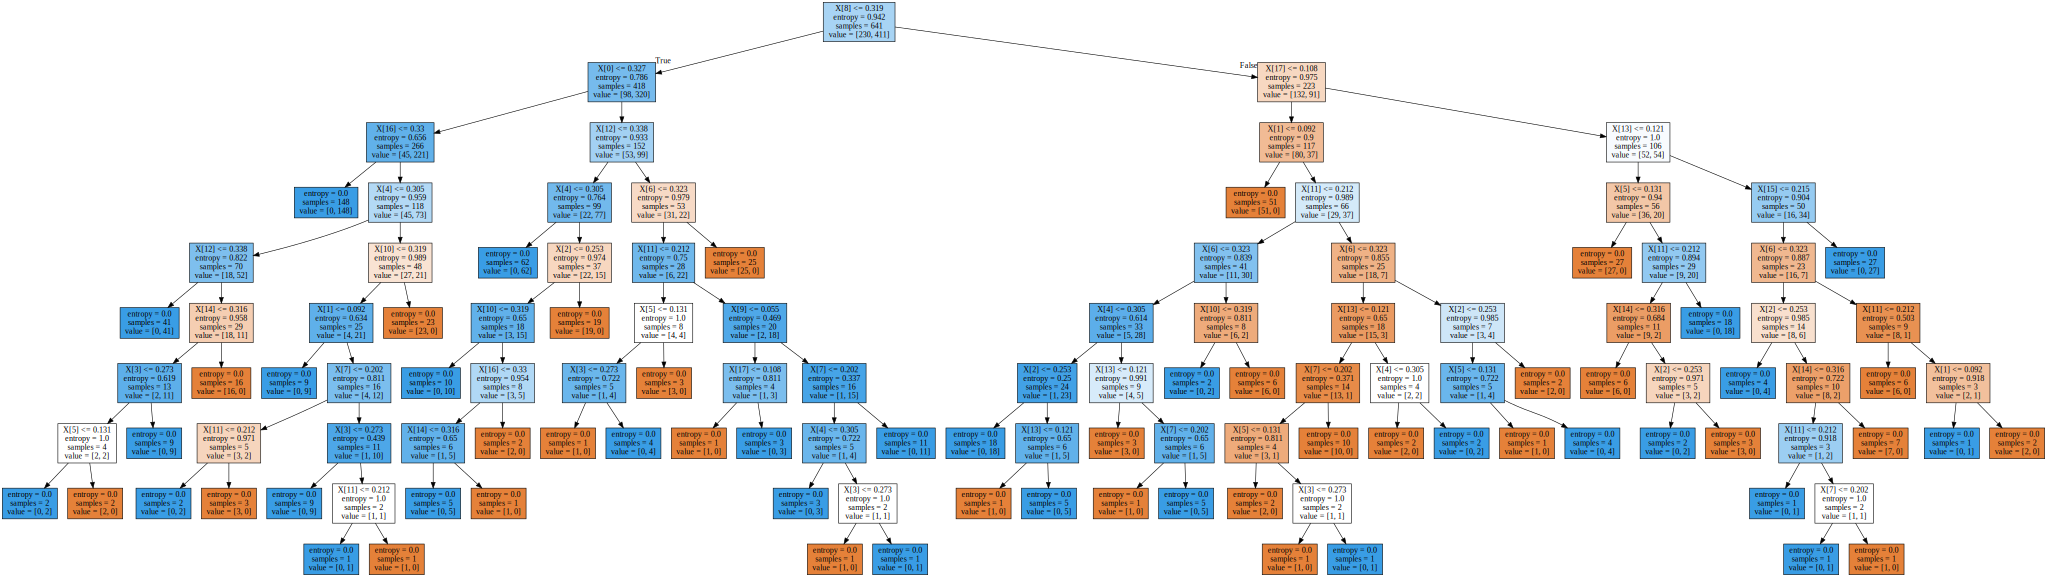

In [131]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

**Conclusion:** <br>Thus, we have applied Decision Tree Algorithm on Tic Tac Toe Endgame and got the accuracy of 95%